In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.metrics import accuracy_score, f1_score
import math

X = pd.read_csv('CATSnDOGS.csv')
y = pd.read_csv('Labels.csv')

X_array = np.array(X)
y_array = np.reshape(np.array(y),-1)

In [ ]:
def get_block(X,row_col):
    X_block = np.zeros(16)
    X_block = X[row_col[0]*16:(row_col[0]+1)*16,row_col[1]*16:(row_col[1]+1)*16]
    return X_block

def get_X_blocks(X,row_col):
    X_blocks = np.zeros((X.shape[0],16*16))
    for i in range(int(X.shape[0])):
        tmp = get_block(np.rot90(np.reshape(X[i],[64,64]), k=-1),row_col)
        X_blocks[i,:] = tmp.flatten()
    return X_blocks

def split_data(X,y,trainsize = 0.8):
    
    M = np.c_[np.linspace(0, y.shape[0]-1, num=y.shape[0]),y,X]
    np.random.shuffle(M)
    index = M[:,0]
    y = M[:,1]
    X = M[:,2:]

    X_train = X[:int(len(X_array)*trainsize),:]
    X_test = X[int(len(X_array)*trainsize):,:]
    y_train = y[:int(len(X_array)*trainsize)]
    y_test = y[int(len(X_array)*trainsize):]
    index_train = index[:int(len(X_array)*trainsize)]
    index_test = index[int(len(X_array)*trainsize):]

    return X_train,X_test,y_train,y_test,index_train,index_test

def classify(X,y,times = 500):
    acc = []
    f1 = []
    test_score = []
    mislabeled = np.zeros(y.shape[0])
    for i in range(times):
        X_train,X_test,y_train,y_test,index_train,index_test = split_data(X,y)
        
        knn = GNB() # Change to GNB for GNB
        knn.fit(X_train,y_train) 
        pred = knn.predict(X_test)
        test_score.append(knn.score(X_train,y_train))
        acc.append(accuracy_score(pred,y_test))
        f1.append(f1_score(pred,y_test))
        for i in range(len(pred)):
            if y_test[i] != pred[i]:
                mislabeled[int(index_test[i])] += 1
    mean_acc = np.mean(acc)
    mean_f1 = np.mean(f1)
    mean_test_score = np.mean(test_score)
    #########################################################
    
    return mean_acc,mean_f1

def classify_blocks(X_array,y_array,N_block):
    acc = []
    f1 = []
    for i in range(16):
        print(i)
        X_blocks = get_X_blocks(X_array,N_block[i])
        mean_acc,mean_f1 = classify(X_blocks,y_array)
        acc.append(mean_acc)
        f1.append(mean_f1)
    return acc,f1
                


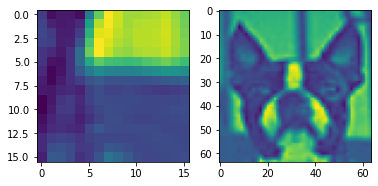

In [ ]:
N_block = [[0,0],[0,1],[0,2],[0,3],[1,0],[1,1],[1,2],[1,3],[2,0],[2,1],[2,2],[2,3],[3,0],[3,1],[3,2],[3,3]]
pic = X_array[0]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)
X_block = get_block(pic,N_block[0])

pic2 = X_array[100]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)
hej = X_blocks[100]
hej = np.reshape(hej,[16,16])
plt.subplot(121)
plt.imshow(hej)
plt.subplot(122)
plt.imshow(pic2)

In [ ]:
acc, f1 = classify_blocks(X_array,y_array,N_block) # Change classifyer in def

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


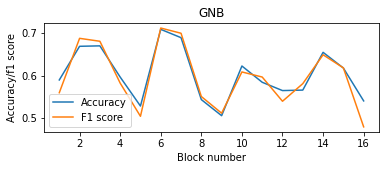

In [ ]:
plt.figure(figsize=(6,2))
plt.title("GNB")
plt.xlabel("Block number")
plt.ylabel("Accuracy/f1 score")
plt.plot(np.linspace(1,16,16),acc,label="Accuracy")
plt.plot(np.linspace(1,16,16),f1,label="F1 score")
plt.legend(loc='best')

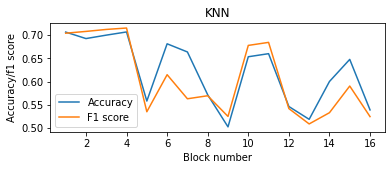

In [ ]:
plt.figure(figsize=(6,2))
plt.title("KNN")
plt.xlabel("Block number")
plt.ylabel("Accuracy/f1 score")
plt.plot(np.linspace(1,16,16),acc,label="Accuracy")
plt.plot(np.linspace(1,16,16),f1,label="F1 score")
plt.legend(loc='best')

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=98914b02-c3e6-4d22-a781-75e1a0c3af40' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>